###### Fakulta aplikovaných věd, Západočeská univerzita v Plzni, 2019

---

# Agent-based-modeling a Axelrodův model šíření kultury

### Semestrální práce KMA/MM

__Anežka Švandová, Jan Půlpán__

## Úvod

Agent-based-modeling (ABM; česky multiagentní modelování), je metoda simulace chování "společenství" agentů. Agentem se rozumí samostatná entita, která má definované chovaní v závislosti na sousedních agentech, případně i okolním prostředí. Narozdíl od modelování dynamických systémů pomocí diferenciálních rovnic nezkoumá ABM jen klidové stavy, případně přechody mezi nimy, ale i vývoj celého systému, který ke klidovému stavu vůbec také nemusí vést. Nejen u agentích modelů většinou mluvíme o ekvilibriu, stavu kdy všichni agenti jsou ve vzájemné rovnováze.

Agenti jsou propojeni mezi sebou do sítě, velmi často ve formě mřížky, případně sítě malého světa, nebo náhodného grafu. Agenti, kteří v rámci sítě spolu sousedí, mohou interagovat. V některých modelech mohou agenti v rámci sítě i "cestovat" a měnit tak svoji polohu.

ABM označujeme také jako modelování "odspoda nahoru". To znamená, že z jednoduchého chování jednotlivých agentů odvozujeme chování celého systému. Jak ukážeme v dalším textu, může být toto globální chování poměrně neočekávané.

ABM může vhodně doplňovat a ověřovat výsledky modelů, které lze řešit analyticky. Je vhodné pro situace, kdy nás zajímá vlastní dynamika systému, ověření kterého rovnovážného stavu dosahuje systém častěji apod. ABM lze také řešit systémy, které nemají ustálené stavy a nejdou tak řešit analyticky.

Konkrétní využití nachází ABM při modelování společenských jevů jako např. šíření informací nebo i virů, vývoj míry nezaměstnanosti, vývoj zaniklých civilizací. V biologii při modelování společenství hmyzu (např mravenců, včel), chování hejn ptáku atd. Firmy pomocí ABM mohou modelovat logistiku, spotřební trhy, zákaznické chování. Další využití je v ekonomii, dopravě nebo i armádě. My se budeme zabývat sociologickými modely, nejvíce pak modelem Roberta Axelroda, šíření kultur.

## Implementace ABM

Obecný matematický postup jak ABM řešit, bohužel neexistuje. MENŠÍ MODEL LZE POPSAT POMOCÍ MARKOVOVA ŘETĚZCE ... POPSAT JAK. ... JE TO ALE SLOŽITÉ PRO VELKÉ MODELY ... NA KONCI (V PŘÍLOZE) SI UKÁŽEME JEŠTĚ JEDEN MOŽNÝ POPIS MOBILU. (několik možných postupů si přesto ukážeme na konci této práce).  

Chování modelu se tak nejčastěji zkoumá pomocí simulací, které ukazují chování modelu v čase. V případě ABM nám simulace umožní sledovat vývoj celého systému. Výsledkem je tedy kromě případně dosaženého ekvilibria i průběh vlastní simulace. Konkrétní model se buď programuje "na zelené louce" nebo se využije jeden z dostupných frameworků nebo softwarů (NetLogo, Repast, MASON nebo např. Mesa pro Python).

Vlastní simulace probíhá v diskrétním čase, po jednotlivých iteracích. Síť, ve které jsou agenti propojeni, je často reprezentována neorientovaným grafem, kdy vrcholy představují jednotlivé agenty a hrany pak jejich propojení. Nejjednoduším tvarem sítě je mřížka, která je velmi jednoduchá na implementaci a nevyžaduje velký výpočetní výkon. V mřížce každý (kromě krajních) agent sousedí se 4 dalšími. V síti malého světa jsou agenti uspořádáni do kruhu a každý sousedí nejen se svými dvěma sousedy, ale ještě se sousedy ob jednoho na každé straně. Navíc mohou být v síti i další náhodná spojení, která propojují agenty z jakékoliv části sítě. Na takovéto síti se implementace poměrně komplikuje a výpočetní čas simulace narůstá. Na obrázku jsou ukázky sítě pro 16 agentů ve formě mřížky a malého světa.

|Mřížka | Malý svět|
|:---:|:---:|
|![alt](mrizka.png) | ![alt](small_world.png)|

Naše implementace je založena na jednoduchém modelu popsaném v článku Roberta Axelroda [1] a implementována jednoduše jako jedna třída v Pythonu.



## Axelrodův model šíření kultur

_"If people tend to become more alike in their beliefs, attitudes, and behavior when they interact, why do not all such a differences eventually dissapear?"_

V roce 1997 popsal Robert Axelrod v článku The dissemination of culture - A model with local convergence and global polarization [1] model šíření kultur, kde se snaží odpovědět na otázku v podtitulu této kapitoly. Agenti v Axelrodově modelu jsou popsáni seznamem vlastností/features. Počet features určuje dimenzi kultury a značíme ho $F$. Každá z features má výčet možných hodnot/traits. Počet traits značíme $q$. Feature může být např. jazyk, náboženství, styl oblékání apod.

Agenti jsou v Axelrodově modelu uspořádáni do pravidelné čtvercové mřížky, kromě krajních má tedy každý agent 4 sousedy. Agenti se v rámci sítě nepřemisťují, lze je tedy brát např. jako homogení síť vesnic. 

Síť agentů se inicializuje náhodnými hodnotami z uniformího diskrétního rozdělení, každý agent $x$ je pak reprezentován vektorem features


$$ X(x) = [X^1(x), X^2(x), \dots , X^F(x)] \;\text{ kde } X^i(x) \in \{1,2,\dots,q\} \;\text{ pro } i=1,2,\dots,F.$$

To, jak a jestli vůbec spolu budou dva sousední agenti interagovat, je závislé na počtu společných features v poměru k počtu všech features. Tuto vlastnost můžeme popsat funkcí similarity pro dva agenty $x$ a $y$:

$$ f(x,y) = \frac{1}{F} \sum_{i=1}^F \delta_{X^i(x), \, X^i(y)}, $$

kde $\delta$ je Kroneckerovo delta

$$ \delta_{k, l} = \begin{cases} 0 \text{ pro } k \neq l \\ 1 \text{ pro } k = l \end{cases}$$

Dva agenti spolu interagují s pravděpodobností rovnou jejich funkci similarity $f(x,y)$. Simulace probíhá v iteracích následujícího algoritmu:

Opakuj následující kroky tolikrát, dokud existuje možnost interakce, nebo není dosaženo maximálního počtu iterací:


1. Vyber náhodně jednoho aktivního agenta $x$ a jednoho jeho náhodného souseda $y$
2. Agenti interagují s pravděpodobností rovnou $f(x,y)$. Pokud interagují, předá soused $y$ aktivnímu agentovi $x$ jednu z vlastností $X^i$, ve které se neshodují, vybranou náhodně.

Jestliže je $f(x,y)=0$ pro dva sousední agenty, pravděpodobnost jejich interakce je $0$ a tedy neinteragují. Pokud je naopak $f(x,y)=1$ je pravděpodobnost interakce sice $100\%$, ale agenti mají shodné všechny features $X^i$ a nemají si tedy co vyměnit. I v tomto případě tedy interakce neprobíhá. Jestliže v síti nejsou již jiná propojení, než ta s $f(x,y)=1$ nebo $f(x,y)=0$ říkáme, že se model nachází v absorbujícím stavu. 

V průběhu simulace se vytváří skupiny sousedících agentů, kteří již vzájemně nemohou dále interagovat. Pokud je jejich funkce similarity $f(x,y)=1$ pro každou dvojici agentů ve skupině, označujeme tuto skupinu jako kulturní region. 

Axelrod se ve svém článku [1] snaží zodpovědět několik otázek. Jak se v modelu budou vyvíjet jednotlivé kultury? Dospěje model k jedné jednotné kultuře, nebo se vytvoří oddělené kulturní regiony? 

## Simulace

Naše implementace modelu šíření kultur pracuje nejen s mřížkou, ale i se síťí malého světa (včetně náhodných propojení) a obecně může pracovat s jakoukoliv strukturou sítě. Kvůli tomu je významně pomalejší než ta, kterou mohl použít Axelrod. Dáno je to tím, že ve čtvercové síti $N$ agentů ve formě mřížky šířky $L=\sqrt{N}$ lze snadno vyhledat a adresovat sousedy. Pro agenta $x_i$ jsou sousedi vlevo/vpravo $x_{i-1}$ a $x_{i+1}$, nahoře/dole pak $x_{i-L}$ a $x_{i+L}$. Oproti tomu je implementace sítě malého světa, ale i libovolné jiné struktury, ve formě (řídkých) matic sousednosti $M_{adj}$ pro větší množství agentů výpočetně náročná primárně na zjišťování dosažení absorbujícího stavu.

Ekvilibria je dosažno tehdy, pokud všechny propojené dvojice agentů mají hodnotu $f(x,y)=0$ případně $f(x,y)=1$ a v síti již tedy není možná žádná další interakce. Hodnotu funkce similarity $f(x,y)$ pro všechny agenty uchováváme v matici global similarity $M_{gs}$. Pokud v matici sousednosti $M_{adj}$ je $s_{i,j}=1$, pak v $M_{gs}$ je $g_{i,j}=f(x_i,x_j)$.  

Simulaci modelu si předvedeme na jednoduché mřížce $4 \times 4$ agentů. Každý z agentu má $F=5$ features a každá z features nabývá jednu z $q=5$ možných traits. Maximální počet iterací je nastaven na $50000$. 

Nejprve model inicializujeme. Na obrázku je znázorněn graf sítě agentů a počáteční náhodný stav vygenerovaný z matice global similarity $M_{gs}$. Barva hran v grafu podobnosti značí hodnotu funkce $f(x,y)$ a tím i pravděpodobnost interakce. Světlejší barva znamená menší hodnotu similarity. Pokud se agenti neshodují v žádné z features, tedy $f(x,y)=0$, není hrana zobrazena vůbec.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

from culture import Culture, Simulation

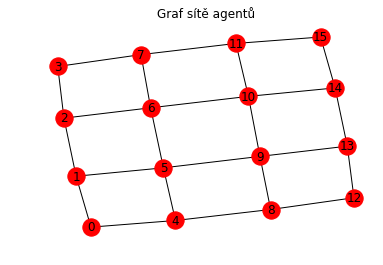

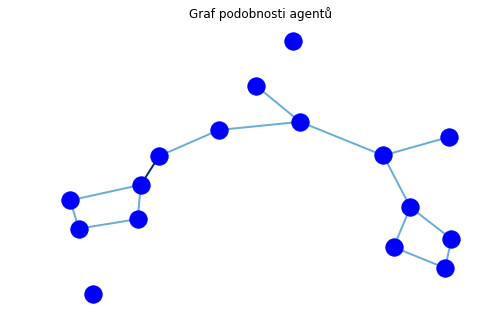

In [9]:
c1 = Culture(16, 1, 5, 5, 50000)
c1.plot_net()
c1.plot_gsnet()

Na takto inicializovaném jednoduchém modelu pustíme simulaci. Na následujících obrázcích je zobrazen graf podobnosti po daném počtu iterací. Z výsledků je vidět, že model konvergoval v 890 krocích a obsahuje jen jeden kulturní region.

In [10]:
c1.simulate(save_progress=200)
c1.analyze()

Počet agentů: 16 (f:5, t:5)
Počet všech propojení: 48
Počet propojení která mohou interagovat (0 < similarity < 1): 0
Počet komponent/kultur: 1

Maximální počet iterací: 50000
Model konvergoval v 890 iteracích




|200 iterací | 400 iterací|
|:---:|:---:|
|![alt](sim1_200.png) | ![alt](sim1_400.png)|

---

|600 iterací | 890 iterací|
|:---:|:---:|
|![alt](sim1_600.png) | ![alt](sim1_final.png)|


Stejnou simulaci provedeme pro síť malého světa. Tato síť umožnuje volitelně zahrnout dodatečná spojení náhodně vybraných agentů. Pro lepší názornost výsledných grafů jsme tuto možnost nepoužili. Ostatní parametry jsou pak shodné se simulací na mřížce, tedy $N=16$, $F=5$, $q=5$ a maximální počet iterací je $50000$.

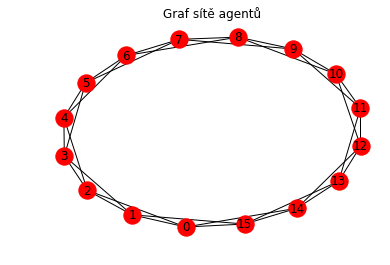

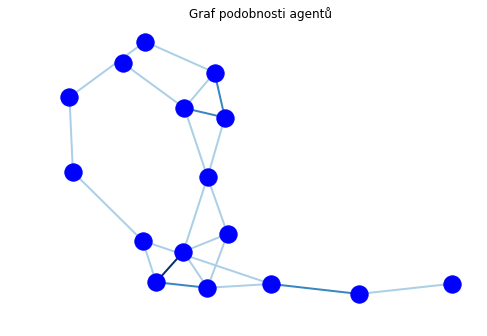

In [13]:
c1 = Culture(16, 0, 5, 5, 50000, random_con=False)
c1.plot_net()
c1.plot_gsnet()

Model opět dosáhl absorbujícího stavu s jedním kulturním regionem, tentokrát v 1086 iteracích. Na obrázcích je průběh simulace.

In [14]:
c1.simulate(save_progress=200)
c1.analyze()

Počet agentů: 16 (f:5, t:5)
Počet všech propojení: 64
Počet propojení která mohou interagovat (0 < similarity < 1): 0
Počet komponent/kultur: 1

Maximální počet iterací: 50000
Model konvergoval v 1086 iteracích




|200 iterací | 400 iterací|
|:---:|:---:|
|![alt](sim0_200.png) | ![alt](sim0_400.png)|

---

|800 iterací | 1086 iterací|
|:---:|:---:|
|![alt](sim0_800.png) | ![alt](sim0_final.png)|



V obou případech (pro mřížku i malý svět) konvergoval model k jednomu stabilnímu kulturnímu regionu. Toto ale nemusí být pravidlem a výsledné ekvilibrium může obsahovat více samostatných regionů. Bude nás zajímat, jaké parametry toto chování ovlivňují a provedeme celou sadu simulací pro různé velikosti sítě. 

## Počet stabilních regionů

Parametrem, který chceme sledovat, je počet kulturních regionů ve výsledném absorbujícím stavu. Konvergence mezi sousedy je v našich modelech běžná, ale tento proces se může zastavit a vznikne tak několik kulturních regionů, každý z nich úplně jiný než ten sousední. Na jakých parametrech závisí počet těchto regionů?

Zajímá nás tedy počet stabilních regionů (komponent grafu) v dosaženém ekvilibriu.  Jako stabilní region lze označit oblast propojených agentů, jejichž similarita $f(x,y)$ je po dvojicích rovna $1$. Protože simulace zahrnuje stochastické vstupy, provedeme větší počet simulací a ty potom budeme analyzovat.

Použijeme stejně nastavený model, jako v svém článku používal Axelrod. Nejprve pro mřížku. Vytvoříme objekt se simulací na $N=100$, tedy čtvercové mřížce $10 \times 10$, pro různé počty features a traits. Pro každou kombinaci pak provedeme 10 simulací a maximálním počtem iterací $100000$. Výsledná zavislost počtu stabilních regionů je zobrazena v tabulce.

In [34]:
s1 = Simulation(a_cnt=[100,],
                c_net=1,
               f_cnt=[5,10,15],
               t_cnt=[5,10,15],
               sim_cnt=10,
               maxiter=100000,
               file='axelrod.csv')

# Běží asi 1,5h
# s1.run_simulations()

s1.regions_table(100)

regions          
traits        5    10   15
features                  
5            1.1  1.4  2.8
10           1.0  1.0  1.0
15           1.0  1.0  1.0

Než okomentujeme výsledky, provedeme simulace se stejně nastavenými parametry i pro síť malého světa. Výsledky jsou opět v tabulce.

In [36]:
s2 = Simulation(a_cnt=[100,],
                c_net=0,
               f_cnt=[5,10,15],
               t_cnt=[5,10,15],
               sim_cnt=10,
               maxiter=100000,
               file='axelrod_small_world.csv')
# s2.run_simulations()
s2.regions_table(100)

regions          
traits        5    10   15
features                  
5            1.0  1.5  2.5
10           1.0  1.0  1.0
15           1.0  1.0  1.0

V obou případech je z výsledků patrné, že počet stabilních regiónů se zvětšuje, pokud je počet traits $q$ větší než počet features $F$. Pokud jsou obě hodnoty porovnatelné, model konverguje k jednomu stabilnímu regionu. Tuto vlastnost ověříme ještě pomocí dalších simulacích s větším počtem agentů a větším rozsahem $F$ a $q$. Simulace jsme provedli pro $225$ agentů (mřížka $15 \times 15$), maximální počet iterací byl $500 000$. V tabulce je závislost výsledného počtu stabilních regionů na počtu features a traits.

In [42]:
s3 = Simulation(a_cnt=[25, 36, 49, 100, 144, 225],
                c_net=1,
               f_cnt=[2, 6, 10],
               t_cnt=[2, 6, 10, 14, 18],
               sim_cnt=5,
               maxiter=500000,
               file='simulations_grid.csv')
# běží asi 14 hodin
# s3.run_simulations()
s3.regions_table(225)

regions                         
traits        2     6     10    14     18
features                                 
2            4.8  15.6  39.2  88.4  122.0
6            1.0   1.0   1.0   1.0    1.4
10           1.0   1.0   1.0   1.0    1.0

Stejná tabulka ještě pro síť malého světa.

In [43]:
s4 = Simulation(a_cnt=[25, 36, 49, 100, 144, 225],
                c_net=0,
               f_cnt=[2, 6, 10],
               t_cnt=[2, 6, 10, 14, 18],
               sim_cnt=5,
               maxiter=500000,
               file='simulations_small_world.csv')

#### Pozor, běží 12 hodin!!!!!
#s4.run_simulations()

s4.regions_table(225)

regions                         
traits        2     6     10    14     18
features                                 
2            3.8  11.6  41.8  94.4  127.4
6            1.0   1.0   1.0   1.0    1.2
10           1.0   1.0   1.0   1.0    1.0

I těmito simulacemi jsme ověřili, že počet stabilních regionů se zvětšuje, pokud je počet traits větší než počet features. 

NENÍ TO JEN TÍM POMĚREM, ALE EXISTUJE NĚJAKÉ $q_c$ OD KTERÉHO VÝŠ JE TEN STAV DISORDERED (JE VÍCE REGIONŮ). UKÁZAT TO NA GRAFECH ZE SIMULACÍ NA KONCI

Původní hypotéza říkala, čím větší je kulturní diverzita (větší počet features $F$), tím více stabilních regionů bude vznikat. Simulace ale ukazují pravý opak. Více features znamená větší opravděpodobnost kdy se v některé z nich budou agenti shodovat a mají tak možnost interagovat.

Zvýšení počtu možných traits $q$ má opačný efekt než zvýšení počtu features $F$. Pokud máme méně features a více traits je zde větší šance, že se sousední agenti na žádné feature neshodnou a nebudou tak interagovat.

Obecně více features znamená méně stabilních regionů, více traits naopak vede k více stabilním regionů.

## Velikost sítě

Jak velikost sítě ovlivní počet stabilních regionů? Axelrod ve svém článku ukazuje funkci závislosti počtu stabilních regionů na velikosti teritoria (počtu agentů). My jsme kvůli zvolené implmentaci obecné sítě a omezenému výpočetnímu výkonu nemohli udělat stejné testy, provedli jsme je tedy na menším vzorku. Výsledky jsou přesto s těmi Axelrodovými porovnatelné.

Využijeme simulace provedené v předchozí kapitole a s pomocí získaných dat ukážeme na grafu závislost průměrného počtu stabilních regionů na velikosti sítě pro mřížku.  Každá simulace byla proveda 5 krát se stejnými parametry $F=6$, $q=14$ a výsledek je zobrazen v grafu. Z něj je patrné, že se výsledný počet stabilních regionů zmenšuje se zvětšující se sítí.

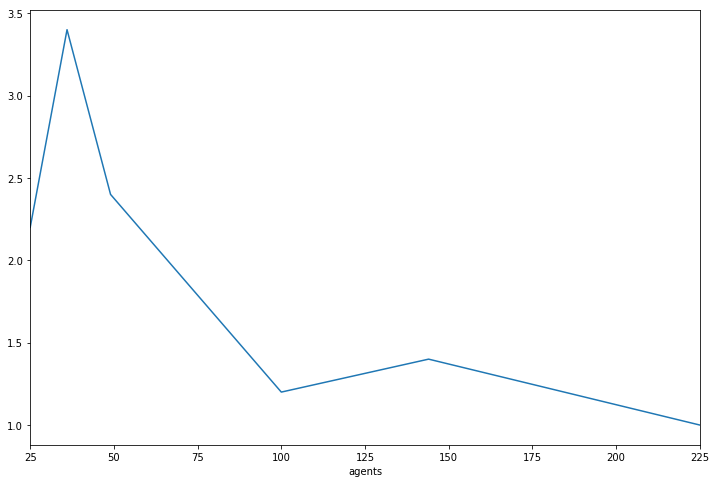

In [45]:
plt.rcParams['figure.figsize'] = [12, 8]
s3.agents_regs_plot(6,14)

Následující obrázek je z Axelrodova článku [1] a ukazuje stejnou závislost počtu stabilních regionů na velikosti sítě, jen s jinými parametry. Sítě byly velikosti $5 \times 5$ až $100 \times 100$, $F=5$, $q=15$.

![Axelrod](axelrod_territory_regions.png "Title")

Podobný graf můžeme získat i pro síť malého světa. Výsledky jsou srovnatelné s tím, co se nám podařilo ukázat na mřížce.

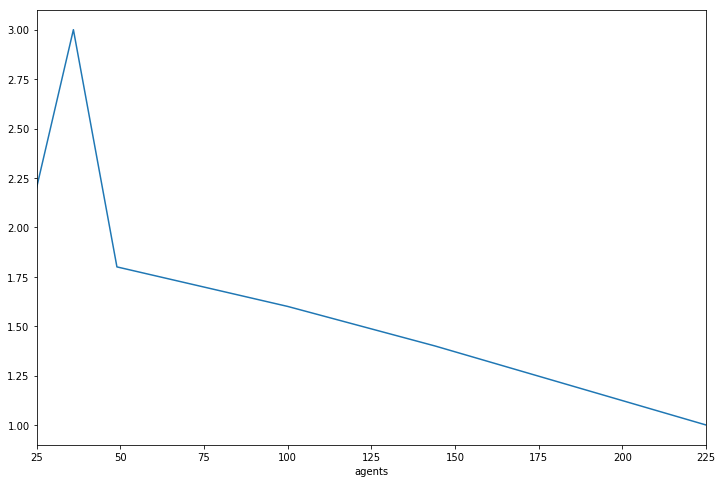

In [19]:
plt.rcParams['figure.figsize'] = [12, 8]
s4.agents_regs_plot(6,14)

## Výsledky

TOHLE PŘEPSAT, HLAVNÍ JE TEN PARAMETR $q_c$. 

Označme počet rozdílných kulturních regionů v případě, že žádná interakce již není možná, jako stupeň polarizace. Podle výsledků simulací pak můžeme říci, že se polarizace zvyšuje pro kultury menší dimenze (méně features) s velkým rozsahem hodnot (traits) jednotlivých feature.

Axelrod z výsledků simulace modelu vyvozuje následující závěry:

- lokální konvergence může vést ke globální polarizaci
- souhra mezi různými kulturními features může formovat proces sociálního ovlivnění 
- i jednoduchá změna parametrů může znamenat neintuitivní výsledky. V našem modelu se to ukázalo například na tom, když velké sítě generují překvapivě malou polarizaci.


Model konverguje k největšímu počtu stabilních regionů když je málo features a hodně traits. Toto ukazuje, že složitější rozdíly, které by se měly vyřešit sociální interakcí jsou ty, kde problémů je málo, ale je hodně možností jak je vyřešit.

## Dodatek - Algebraizace modelu


Vraťme se k obecnějšímu matematickému popisu ABM. 

- Markovův řetězec - vysvětlit - neefektivnost - (https://cs.wikipedia.org/wiki/Markovův_řetězec)

Sice neexistuje standard, podle kterého bychom ABM mohli popsat matematicky, i proto se modely většinou studují pomocí simulací. Grimm a kol. [4] navrhli ODD protocol (Overview, Design concepts, Details), který takové modely umožňuje popsat. Na základě tohoto popisu navrhli Hinkelmann, Murrugarra a Jarrah [3] rozšíření nad ODD protokolem, které agentí model umí popsat jako časově diskrétní dynamické systémy s algebraickou strukturou na konečném stavovém prostoru. V takovémto modelu lze nalézt ekvilibria vyřešením soustavy polynomiálních rovnic.

Stav celého systému popíšeme jako vektor hodnot, jedna pro každou modelovou proměnnou $x_i$ (agenta). Funkcí $f$ (deterministickou nebo stochastickou) pak definujeme přechod z jednoho stavu do druhého. Dynamika systému je definována iteracemi přes funkci $f$. ODD definuje standardní šablonu na specifikaci stavového prostoru a přechodové funkce $f$.

Stavový prostor $\mathbb{F}$ tvoří konečné těleso. Například na jednoduchém boolovském prostoru uvažujeme $\mathbb{F}_2 = \{0,1\}$.

Nechť jsou $x_1,\dots,x_n$  stavové proměnné (agenti). Jejich stav je z $\mathbb{F}$. Definujeme lokální přechodovou funkci $f_i : \mathbb{F^n} \longrightarrow \mathbb{F}$. Funkce je lokální, protože určuje stav jednoho agenta $x$ a vstupem jsou jen stavy sousedních agentů. Celý dynamický systém pak můžeme popsat funkcí 

$$f = (f_1,\dots,f_n): \mathbb{F^n} \longrightarrow \mathbb{F^n},$$

kde všechny $f_i \in \mathbb{F}[x_1, \dots , x_n]$ jsou polynomy.

Tento popis modelu nám umožní:

- popsat modely matematicky
- hledat ekvilibria pomocí standardních algebraických nástrojů, konkrétně řešení soustavy polynomiální rovnic
- takto popsané modely můžeme snadno porovnávat

I když jde poměrně velká část ABM modelů řešit tímto způsobem, opět záleží hodně na velikosti sítě, komplexnosti přechodové funkce $f$ a v neposlední řadě i výkonosti dostupného hardwaru, jestli jsme schopni model "upočítat". Nové postupy v řešení soustavy polynomiálních rovnic tomu napomáhají.

__Příklad: Conway's Game of Life__

Máme čtvercovou síť (mřížku) buňek (agentů), které nabývají jednoho ze dvou stavů. Buď LIVE (1) nebo DEAD (0). Každá buňka má 8 sousedů (vlevo/vpravo, nahoře/dole, diagonálně). Model se řídí následujícími pravidly:

1. každá živá buňka s méně než 2 živými sousedy umírá
2. každá živá buňka s více než 3 živými sousedy umírá
3. každá živá buňka s 2 nebo 3 živými sousedy zůstává naživu
4. každá mrtvá buňka s přesně 3 živými sousedy obživne

Protože existují jen 2 možné stavy, lze stavový prostor popsat velmi snadno jako $\mathbb{F}_2$. Každý agent $x$ má 8 sousedů $x_1, \dots, x_8$. Můžeme proto definovat funkci 

$$f_x(x,x_1,\dots,x_8)= \begin{cases} 0 : \sum x_i < 2 \\ 0 : \sum x_i = 2 \text{ a } x = 0 \\ 1 : \sum x_i = 2 \text{ a } x = 1 \\ 1 : \sum x_i = 3 \\ 0 : \sum x_i > 3\end{cases}.$$

Algebraický model pro Game of Life má pak tvar 

$$f = (f, \dots, f_{n \times n}):\mathbb{F}_2^{n \times n} \longrightarrow \mathbb{F}_2^{n \times n},$$
$$x_i \mapsto f_i(x_1, \dots, x_{n \times n}),$$

kde $n$ je dimenze čtvercové mřížky. Abychom našli všechny stabilní stavy modelu, musíme vyřešit soustavu polynomiálních rovnic

$$f_i(x) - x_i = 0, \; i=1\dots n \times n.$$

Na mřížce $4 \times 4$ existuje celkem $2^{16} = 65536$ stavů. Model je popsán 16 rovnicemi. Takovýto systém lze vyřešit poměrně snadno. Pro větší mřížky stavový prostor rychle narůstá a stejně tak i počet rovnic.

## Literatura

[1] Axelrod R, (1997) The dissemination of culture - A model with local	convergence and global polarization. Journal of Conflict Resolution 41(2), pp. 203-226.

[2] Watts, D., Strogatz, S. (1998) Collective dynamics of ‘small-world’ networks. Nature 393, 440–442.  doi:10.1038/30918

[3] Hinkelmann, F., Murrugarra, D., Jarrah, A.S. et al. A Mathematical Framework for Agent Based Models of Complex Biological Networks, Bull Math Biol (2011) 73: 1583. https://doi.org/10.1007/s11538-010-9582-8

[4] Grimm, V. ; Berger, U. ; Bastiansen, F. ; Eliassen, S. ; Ginot, V. ; Giske, J. ; Goss-Custard, J. ; Grand, T. ; Heinz, S.K. ; Huse, G. ; Huth, A. ; Jepsen, J.U. ; Jørgensen, C. ; Mooij, W.M. ; Müller, B. ; Pe’er, G. ; Piou, C. ; Railsback, S.F. ; Robbins, A.M. ; Robbins, M.M. ; Rossmanith, E. ; Rüger, N. ; Strand, E. ; Souissi, S. ; Stillman, R.A. ; Vabø, R. ; Visser, U. ; DeAngelis, D.L. / A standard protocol for describing individual-based and agent-based models. In: Ecological Modelling. 2006 ; Vol. 198, No. 1-2. pp. 115-126.

In [6]:
%%time
del sQ
sQ = Simulation(a_cnt=[16,],
                c_net=1,
               f_cnt=[5,20,50,100],
               t_cnt=[3,5,10,30,60,100,500,1000],
               sim_cnt=10,
               maxiter=100000,
               file='test_big_q16_mrizka.csv')
sQ.run_simulations()
sQ.regions_table(16)

Progress: [####################] 100.0%


regions                                       
traits      3    5    10   30    60    100   500   1000
features                                               
5            1.1  1.5  3.0  8.4  13.3  13.3  15.4  15.5
20           1.0  1.0  1.0  1.1   3.6   7.2  14.3  15.4
50           1.0  1.0  1.0  1.0   1.0   1.3  10.4  13.7
100          1.0  1.0  1.0  1.0   1.0   1.0   6.3  11.3

CPU times: user 43min 7s, sys: 31.9 s, total: 43min 38s
Wall time: 44min 36s


In [8]:
%%time

sQ2 = Simulation(a_cnt=[16,],
                c_net=0,
               f_cnt=[5,20,50],
               t_cnt=[3,5,10,30,60,100,500,1000],
               sim_cnt=10,
               maxiter=100000,
               file='test_big_q16_maly_svet.csv')
sQ2.run_simulations()
sQ2.regions_table(16)
del sQ2

Progress: [####################] 100.0%


regions                                       
traits      3    5    10   30    60    100   500   1000
features                                               
5            1.0  1.3  2.8  9.6  11.2  12.7  15.7  15.7
20           1.0  1.0  1.0  1.2   2.2   6.9  13.5  15.1
50           1.0  1.0  1.0  1.0   1.2   1.9  11.3  13.7

CPU times: user 10min 44s, sys: 9.64 s, total: 10min 53s
Wall time: 10min 54s


In [2]:
%%time

sQ3 = Simulation(a_cnt=[25,],
                c_net=0,
               f_cnt=[5,20,50],
               t_cnt=[3,5,10,30,60,100,500,1000],
               sim_cnt=5,
               maxiter=100000,
               file='test_big_q25_maly_svet.csv')
sQ3.run_simulations()
sQ3.regions_table(25)
del sQ3

Progress: [####################] 100.0%


regions                                        
traits      3    5    10    30    60    100   500   1000
features                                                
5            1.0  1.6  2.2  12.0  18.6  19.8  24.6  24.4
20           1.0  1.0  1.0   1.6   3.4  12.6  21.2  23.4
50           1.0  1.0  1.0   1.0   1.0   1.4  16.0  20.2

CPU times: user 15min 24s, sys: 10.6 s, total: 15min 35s
Wall time: 15min 41s


Progress: [####################] 100.0%


regions                                                              \
traits      3    5    10   20   25   30   35   40   42   44   46   48   50     
features                                                                       
20           1.0  1.0  1.0  1.0  1.3  1.2  1.3  1.7  2.3  1.9  2.4  2.2  2.9   

                                           
traits   60   80   100   300   500   1000  
features                                   
20        4.0  5.5  7.0  11.8  13.1  14.9

CPU times: user 5min 40s, sys: 9.28 s, total: 5min 49s
Wall time: 5min 45s


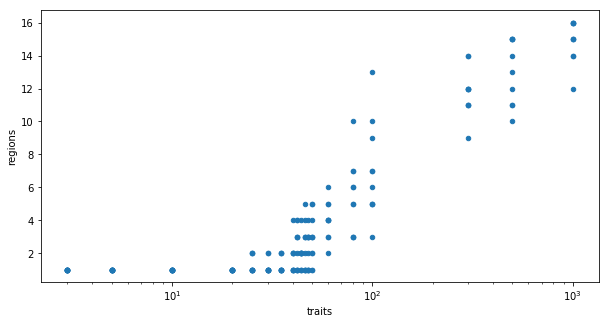

In [6]:
%%time

sQ4 = Simulation(a_cnt=[16,],
                c_net=1,
               f_cnt=[20,],
               t_cnt=[3,5,10,20,25,30,35,40,42,44,46,48,50,60,80,100,300,500,1000],
               sim_cnt=10,
               maxiter=100000,
               file='test_big_q16_f20_mrizka.csv')
sQ4.run_simulations()
sQ4.regions_table(16)
sQ4.traits_regs_plot(a_cnt=16, f_cnt=20)
del sQ4

Progress: [####################] 100.0%


regions                                                              \
traits      3    5    10   20   25   30   35   40   42   44   46   48   50     
features                                                                       
20           1.0  1.0  1.0  1.0  1.1  1.5  1.5  2.1  2.1  1.6  1.5  2.4  2.0   

                                           
traits   60   80   100   300   500   1000  
features                                   
20        4.1  5.9  7.2  12.3  13.4  15.5

CPU times: user 5min 41s, sys: 12 s, total: 5min 53s
Wall time: 5min 45s


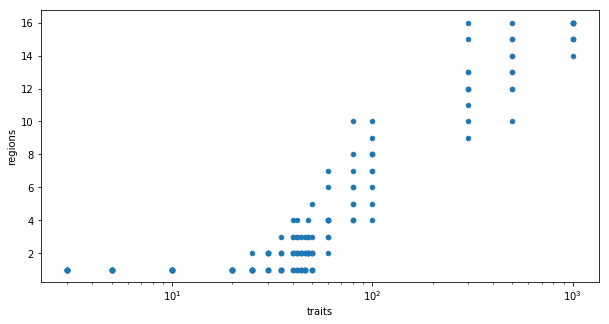

In [4]:
%%time

sQ5 = Simulation(a_cnt=[16,],
                c_net=0,
               f_cnt=[20,],
               t_cnt=[3,5,10,20,25,30,35,40,42,44,46,48,50,60,80,100,300,500,1000],
               sim_cnt=10,
               maxiter=100000,
               file='test_big_q16_f20_maly_svet.csv')
sQ5.run_simulations()
sQ5.regions_table(16)
sQ5.traits_regs_plot(a_cnt=16, f_cnt=20)
del sQ5

Progress: [####################] 100.0%


regions                                                              \
traits      3    5    10   20   25   30   35   40   42   44   46   48   50     
features                                                                       
20           1.0  1.0  1.0  1.1  1.1  1.1  1.6  2.4  2.1  2.9  2.9  2.8  2.9   

                                           
traits   60   80   100   300   500   1000  
features                                   
20        3.3  6.9  7.7  18.8  21.5  23.5

CPU times: user 14min 34s, sys: 16.6 s, total: 14min 51s
Wall time: 14min 41s


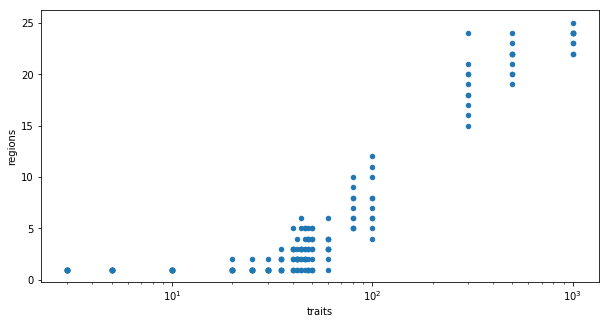

In [7]:
%%time

sQ6 = Simulation(a_cnt=[25,],
                c_net=1,
               f_cnt=[20,],
               t_cnt=[3,5,10,20,25,30,35,40,42,44,46,48,50,60,80,100,300,500,1000],
               sim_cnt=10,
               maxiter=100000,
               file='test_big_q25_mrizka.csv')
sQ6.run_simulations()
sQ6.regions_table(25)
sQ6.traits_regs_plot(a_cnt=25, f_cnt=20)
del sQ6

Progress: [####################] 100.0%


regions                                                              \
traits      3    5    10   20   25   30   35   40   42   44   46   48   50     
features                                                                       
20           1.0  1.0  1.0  1.0  1.0  1.3  1.2  1.2  1.8  2.2  2.6  2.8  2.8   

                                           
traits   60   80   100   300   500   1000  
features                                   
20        3.0  5.5  7.7  19.7  22.0  24.0

CPU times: user 14min 57s, sys: 16.8 s, total: 15min 13s
Wall time: 15min 6s


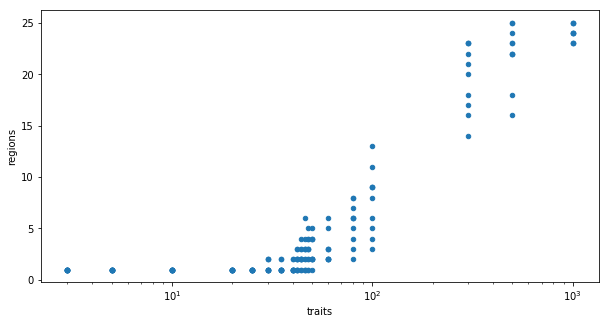

In [8]:
%%time

sQ7 = Simulation(a_cnt=[25,],
                c_net=0,
               f_cnt=[20,],
               t_cnt=[3,5,10,20,25,30,35,40,42,44,46,48,50,60,80,100,300,500,1000],
               sim_cnt=10,
               maxiter=100000,
               file='test_big_q25_f20_maly_svet.csv')
sQ7.run_simulations()
sQ7.regions_table(25)
sQ7.traits_regs_plot(a_cnt=25, f_cnt=20)
del sQ7